# 🌐 Functional Connectivity from DiFuMo Time Series  
### *A single-subject tutorial for source-level EEG connectivity*

This notebook shows you how to compute **one clean, labeled connectivity matrix** from your LCMV+DiFuMo time courses using:
- Your **exact motor/cognitive ROI list** (Motor M1, Thalamus, Executive Control, etc.)
- **Debiased WPLI** (robust to volume conduction)
- **Frequency-band-specific** estimation (Alpha, Beta, Gamma…)
- Output as a **human-readable CSV** (openable in Excel)



In [5]:
## 📦 Requirements

# pip install -U mne-connectivity

## 🧪 Step 1: Import Your Connectivity Pipeline

In [ ]:
from roi_connectivity import (
    create_rest_epochs,
    compute_roi_connectivity_matrix
)

## ▶️ Step 2: Create Epochs

In [8]:
# Point to your DiFuMo time courses (output from LCMV pipeline)
DATA_FILE = r"sub-02_rest/difumo_time_courses.npy"

# Chop into 2.5-second non-overlapping epochs
epochs = create_rest_epochs(
    data_file=DATA_FILE,
    duration=2.5,      # seconds
    sfreq=500.0
)

print(f"✅ Created {len(epochs)} resting-state epochs")

✅ Created 21 resting-state epochs


## 🌐 Step 3: Compute Connectivity Matrix

In [9]:
# Choose your frequency band
BAND = "Low_Beta"  # Options: Theta, Alpha, Low_Beta, High_Beta, Low_Gamma, High_Gamma

# Compute one matrix across all epochs
conn_matrix = compute_roi_connectivity_matrix(
    epochs=epochs,
    band_name=BAND,
    method='wpli2_debiased',
    sfreq=500.0
)

print(f"🌐 Connectivity matrix shape: {conn_matrix.shape}")
print(f"   → {conn_matrix.shape[0]} ROIs from your custom list")

[fetch_atlas_difumo] Dataset found in C:\Users\yucca\nilearn_data\difumo_atlases
🌐 Connectivity matrix shape: (93, 93)
   → 93 ROIs from your custom list


## 💾 Step 4: Save to CSV

In [12]:
import os

# Build output path
output_dir = os.path.dirname(DATA_FILE)
os.makedirs(output_dir, exist_ok=True)

csv_path = os.path.join(output_dir, f"connectivity_{BAND}.csv")
conn_matrix.to_csv(csv_path)
print(f"✅ Saved connectivity matrix to:\n   {csv_path}")

✅ Saved connectivity matrix to:
   sub-02_rest\connectivity_Low_Beta.csv


## 🔍 Step 5: Inspect the Matrix

In [13]:
conn_matrix.head()

,Insula antero-inferior,Middle frontal gyrus middle RH,Angular sulcus superior LH,Paracingulate sulcus LH,Caudate RH,Central sulcus middle RH,Frontal pole superior RH,Postcentral sulcus LH,Middle frontal gyrus mid-anterior LH,Caudate superior,...,Putamen RH,Insula superior,Cingulate sulcus mid-posterior,Putamen postero-superior,Cerebellum Crus II medial RH,Cerebellum IV superior,Cingulate sulcus posterior LH,Callosomarginal sulcus inferior,Superior occipital sulcus RH,Superior temporal gyrus superior LH
Insula antero-inferior,0.000000,0.024537,0.037825,-0.026851,0.008814,0.021657,-0.033182,-0.001205,0.044785,0.003315,...,-0.027845,-0.056897,-0.010727,0.006499,-0.031460,-0.012310,-0.007041,0.006500,0.011503,0.007293
Middle frontal gyrus middle RH,0.024537,0.000000,-0.022775,-0.031992,-0.000847,0.020118,-0.006584,-0.014534,-0.006076,-0.005296,...,-0.015471,-0.024322,-0.003155,-0.008768,-0.006132,0.010022,0.008655,0.007283,-0.011447,-0.009173
Angular sulcus superior LH,0.037825,-0.022775,0.000000,0.011945,0.066714,-0.011922,-0.035515,0.058325,-0.007336,-0.003625,...,0.003388,0.001776,0.015296,0.055824,0.002840,0.027954,0.023426,0.016335,-0.016222,0.014025
Paracingulate sulcus LH,-0.026851,-0.031992,0.011945,0.000000,-0.013084,0.033788,-0.030791,-0.013268,0.036865,-0.026574,...,0.006994,-0.018226,-0.042755,0.015441,-0.015603,-0.035338,-0.052920,-0.031733,0.027396,-0.008221
Caudate RH,0.008814,-0.000847,0.066714,-0.013084,0.000000,-0.001264,0.022024,-0.017173,-0.030774,0.013368,...,0.006237,-0.038436,0.003661,0.008147,-0.026747,-0.009719,0.001568,0.003271,0.010503,-0.004603


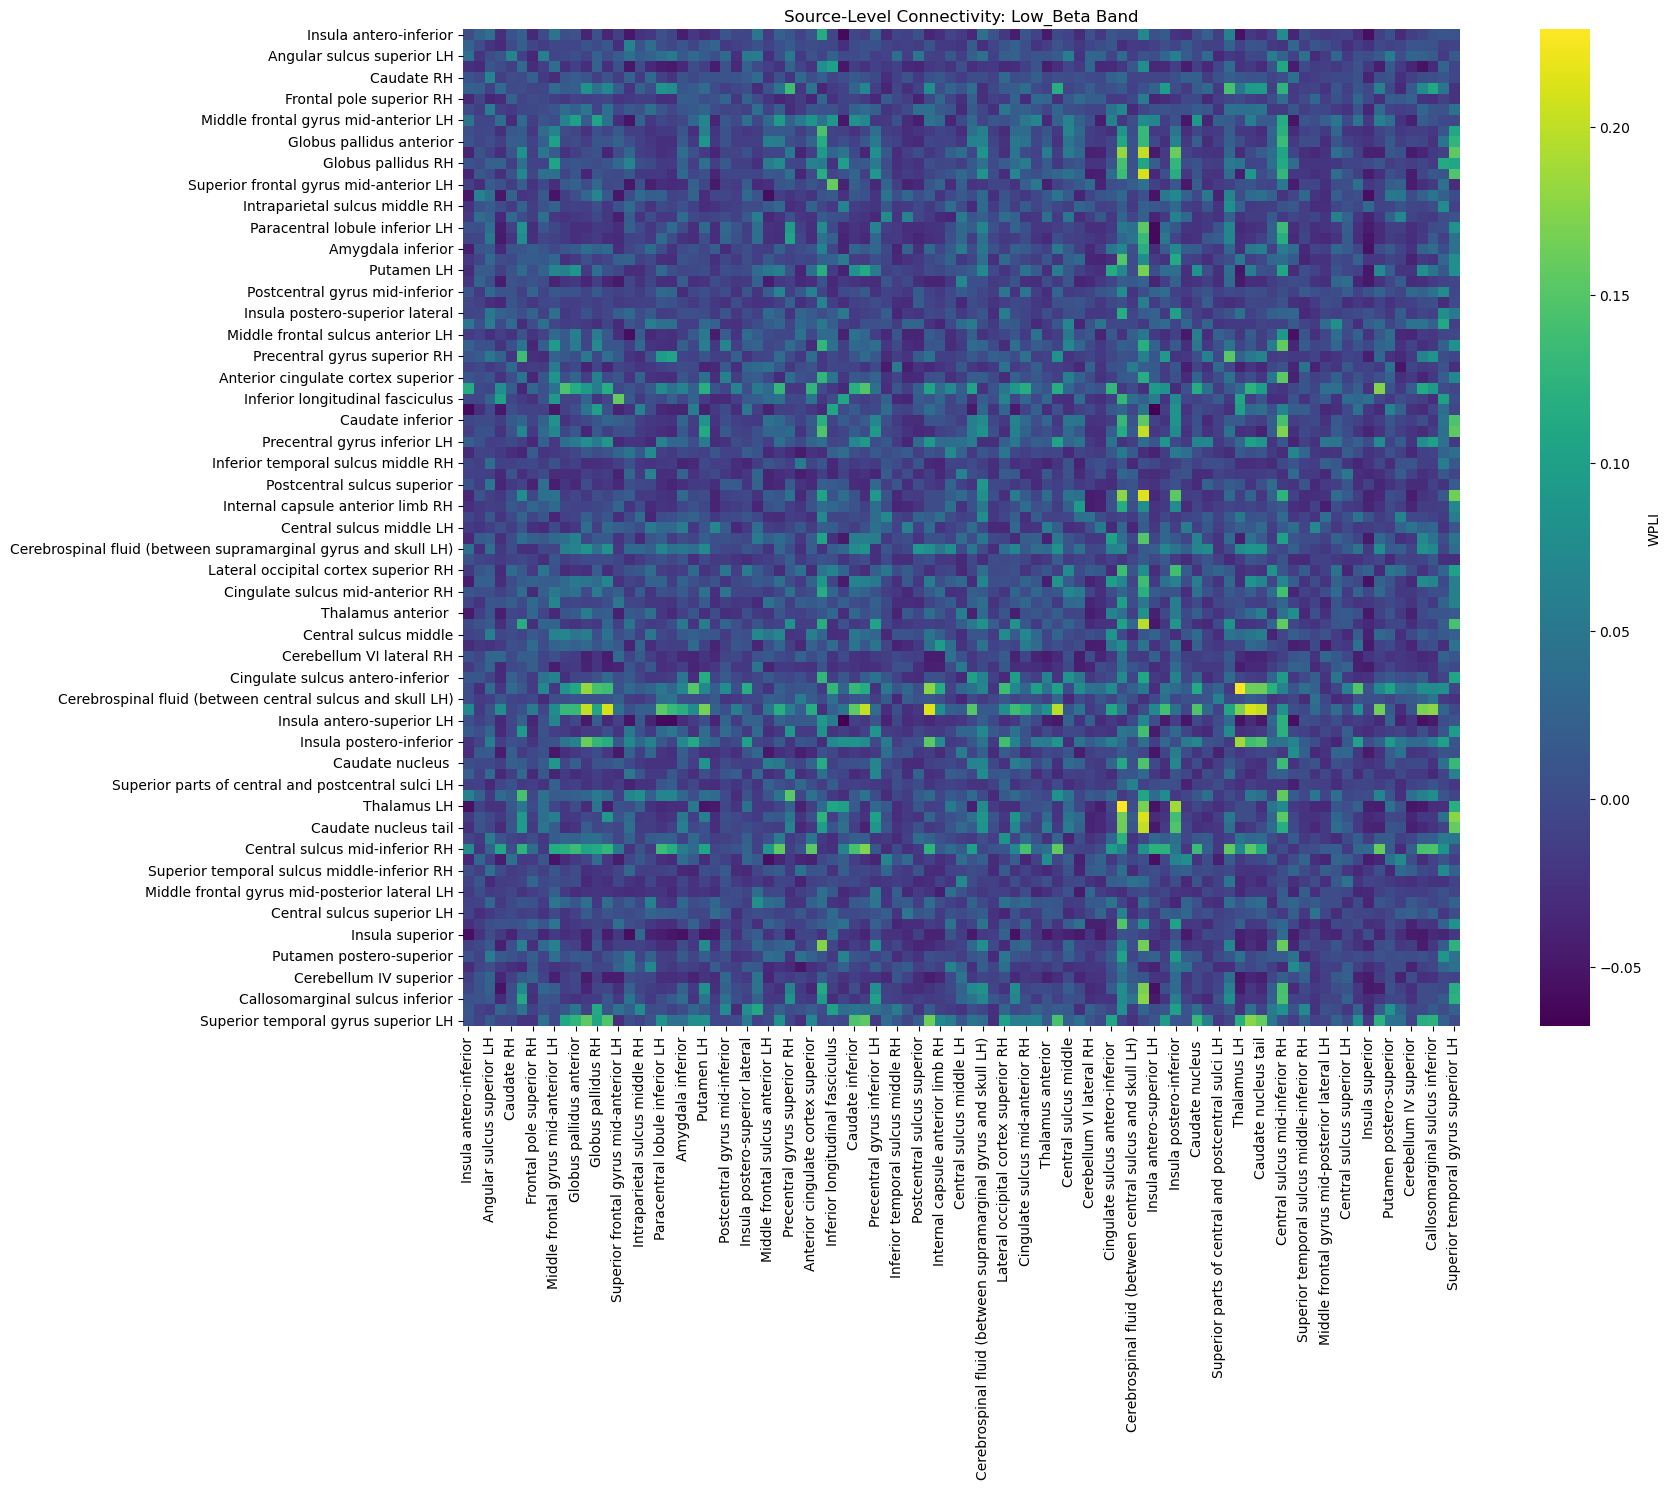

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(conn_matrix, cmap="viridis", square=True, cbar_kws={'label': 'WPLI'})
plt.title(f"Source-Level Connectivity: {BAND} Band")
plt.tight_layout()
plt.show()

## 💡 How It Works

1. **Input**: `difumo_time_courses.npy` → `(512, n_times)`  
2. **ROI Selection**: Extracts only your **87 motor/cognitive regions** (from hard-coded list)  
3. **Epoching**:
   - **Rest**: Splits data into 2.5s windows (no events needed)
   - **Task**: Uses your event files and condition labels
4. **Connectivity**:
   - Uses `mne_connectivity.spectral_connectivity_epochs`
   - **Debiased WPLI**: robust to noise and leakage
   - **Multitaper**: optimal spectral estimation
   - **Averaged over epochs & frequencies** → one matrix
5. **Output**: Pandas DataFrame with **real ROI names** → ready for ML or stats


